Import

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

all data


Training Accuracy score: 0.9998898476225445
Testing Accuracy score: 0.8341900425906887
classification_report 
               precision    recall  f1-score   support

           0       0.75      0.76      0.76      2283
           1       0.88      0.87      0.87      4526

    accuracy                           0.83      6809
   macro avg       0.81      0.82      0.81      6809
weighted avg       0.84      0.83      0.83      6809



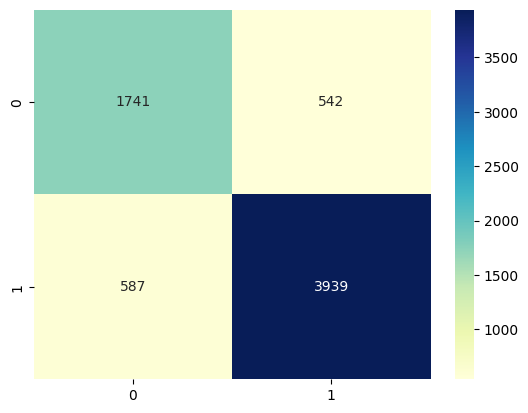

In [4]:
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/data+column_relation.csv')

x=df.iloc[:, :-3]
y = df.account_type.values.tolist()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)
clt = DecisionTreeClassifier()
clt.fit(x_train,y_train)
y_pred_train = clt.predict(x_train)
y_pred_test = clt.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

print("classification_report \n "+classification_report(y_test, y_pred_test))

from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

Accuracy: 79.56%

Training Accuracy score: 0.9999265650816963
Testing Accuracy score: 0.7955646937876341
classification_report 
               precision    recall  f1-score   support

           0       0.69      0.71      0.70      2309
           1       0.85      0.84      0.84      4500

    accuracy                           0.80      6809
   macro avg       0.77      0.78      0.77      6809
weighted avg       0.80      0.80      0.80      6809



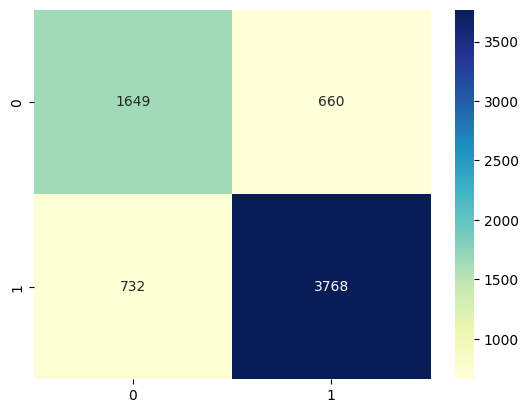

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv('./Data/data+column_relation.csv')

x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf', DecisionTreeClassifier()) # Training a random forest classifier on the data
])

pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)

print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

print("classification_report \n "+classification_report(y_test, y_pred_test))

from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

TomekLinks undersimpling


Training Accuracy score: 0.9999221880714314
Testing Accuracy score: 0.8436041083099907
DecisionTreeClassifier score: 0.9999221880714314
classification_report 
               precision    recall  f1-score   support

           0       0.78      0.79      0.78      2304
           1       0.88      0.87      0.88      4122

    accuracy                           0.84      6426
   macro avg       0.83      0.83      0.83      6426
weighted avg       0.84      0.84      0.84      6426



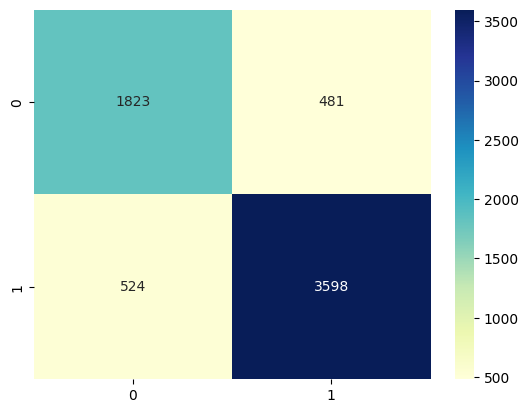

In [5]:

from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/data+column_relation.csv')
tl = TomekLinks()
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

x, y = tl.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)
clt = DecisionTreeClassifier()
clt.fit(x_train,y_train)
y_pred_train = clt.predict(x_train)
y_pred_test = clt.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("DecisionTreeClassifier score:",clt.score(x_train, y_train))
print("classification_report \n "+classification_report(y_test, y_pred_test))

from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

random undersimpling

In [6]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.tree import DecisionTreeClassifier
# df = pd.read_csv('./Data/datavf.csv')

# x=df.iloc[:, :-4]
# y = df.account_type.values.tolist()
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
# pipeline = Pipeline([
#     ('rf', DecisionTreeClassifier()) # Training a random forest classifier on the data
# ])

# pipeline.fit(x_train, y_train)

# score = pipeline.score(x_test, y_test)
# print("Accuracy: %.2f%%" % (score * 100))
# y_pred_train = pipeline.predict(x_train)
# y_pred_test = pipeline.predict(x_test)

# print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
# print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
# print("DecisionTreeClassifier score:",pipeline.score(x_train, y_train))
# print("classification_report \n "+classification_report(y_test, y_pred_test))

# from sklearn.metrics import confusion_matrix
# cm = metrics.confusion_matrix(y_test,  y_pred_test)

# cm_matrixNB = pd.DataFrame(data=cm)
# sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
# plt.show()

with StandardScaler et dimensionality reduction techniques.

In [7]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.tree import DecisionTreeClassifier
# df = pd.read_csv('./Data/datavf.csv')

# x=df.iloc[:, :-4]
# y = df.account_type.values.tolist()
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
# pipeline = Pipeline([
#     ('scaler', StandardScaler()), # Standardizing the data
#     ('pca', PCA()), # Transforming the data with PCA
#     ('rf', DecisionTreeClassifier()) # Training a random forest classifier on the data
# ])

# pipeline.fit(x_train, y_train)

# score = pipeline.score(x_test, y_test)
# print("Accuracy: %.2f%%" % (score * 100))
# y_pred_train = pipeline.predict(x_train)
# y_pred_test = pipeline.predict(x_test)

# print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
# print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
# print("DecisionTreeClassifier score:",pipeline.score(x_train, y_train))
# print("classification_report \n "+classification_report(y_test, y_pred_test))

# from sklearn.metrics import confusion_matrix
# cm = metrics.confusion_matrix(y_test,  y_pred_test)

# cm_matrixNB = pd.DataFrame(data=cm)
# sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
# plt.show()

oversimpling

Accuracy: 84.77%

 Training Accuracy score: 0.9999166689814172
Testing Accuracy score: 0.847683590712143
classification_report 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      4501
           1       0.86      0.84      0.85      4500

    accuracy                           0.85      9001
   macro avg       0.85      0.85      0.85      9001
weighted avg       0.85      0.85      0.85      9001



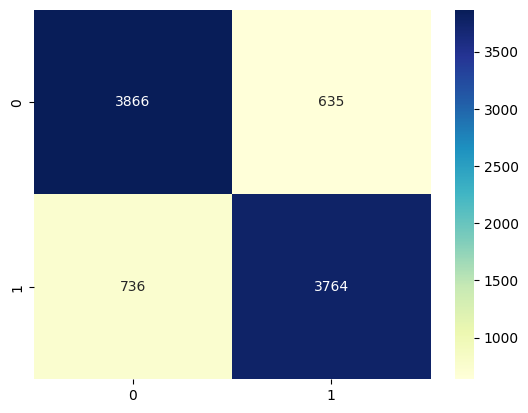

In [8]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
df = pd.read_csv('./Data/data+descvf.csv')

x=df.iloc[:, :-3]
y = df.account_type.values.tolist()
smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('rf', DecisionTreeClassifier()) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
# feat_importances = pd.Series(pipeline['rf'].feature_importances_, index=x.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# with feature selection 

 oversimplings

In [9]:
from sklearn.pipeline import Pipeline

Accuracy: 85.13%

 Training Accuracy score: 0.9999444459876115
Testing Accuracy score: 0.8513498500166649
classification_report 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      4501
           1       0.86      0.84      0.85      4500

    accuracy                           0.85      9001
   macro avg       0.85      0.85      0.85      9001
weighted avg       0.85      0.85      0.85      9001



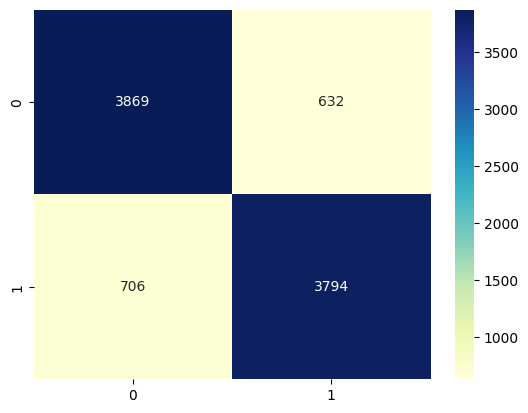

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/data+column_relation.csv')
# verified  location tweet_language url avg_tweets_by_hour_of_day following/years followers/lastpost 
data1=data1.loc[:,[ 'statuses', 'date_joined',
       'most_recent_post', 'following', 'followers',  'favourites', 'lists',
          'tweets_this_week','retweet', 'retweeted_count',
        'userNameScore', 
       'avg_tweets_by_day_of_week', 
       'engagment_rate', 'description', 'screen_name', 'account_type']]
from imblearn.over_sampling import SMOTE
df=data1
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('rf', DecisionTreeClassifier( random_state=42)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)
cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

undersampling

Accuracy: 84.21%

 Training Accuracy score: 0.9999219603558608
Testing Accuracy score: 0.8420724094881398
classification_report 
               precision    recall  f1-score   support

           0       0.78      0.77      0.78      2309
           1       0.87      0.88      0.88      4099

    accuracy                           0.84      6408
   macro avg       0.83      0.83      0.83      6408
weighted avg       0.84      0.84      0.84      6408



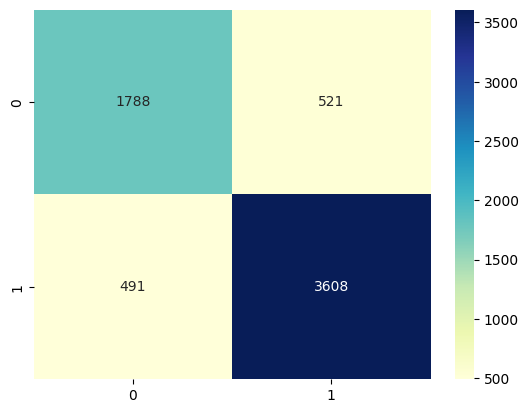

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/data+column_relation.csv')
# verified  location tweet_language url avg_tweets_by_hour_of_day following/years followers/lastpost 
data1=data1.loc[:,[ 'statuses', 'date_joined',
       'most_recent_post', 'following', 'followers',  'favourites', 'lists',
          'tweets_this_week','retweet', 'retweeted_count',
        'userNameScore', 
       'avg_tweets_by_day_of_week', 
       'engagment_rate', 'description', 'screen_name', 'account_type']]
from imblearn.over_sampling import SMOTE
df=data1
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

tmk =TomekLinks()
x, y =tmk.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('rf', DecisionTreeClassifier( random_state=42)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)
cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

random undersimpling

In [12]:
# data1 = pd.read_csv('./Data/data+column_relation.csv')
# # verified  location tweet_language url avg_tweets_by_hour_of_day following/years followers/lastpost 
# data1=data1.loc[:,[ 'statuses', 'date_joined',
#        'most_recent_post', 'following', 'followers',  'favourites', 'lists',
#           'tweets_this_week','retweet', 'retweeted_count',
#         'userNameScore', 
#        'avg_tweets_by_day_of_week', 
#        'engagment_rate', 'description', 'screen_name', 'account_type']]



# df1=data1[data1.account_type== 1].head(11000)
# df2=data1[data1.account_type== 0].head(11000)
# df = pd.concat([df1, df2], ignore_index=True)
# x=df.iloc[:, :-3]
# y = df.account_type.values.tolist()

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
# pipeline = Pipeline([
#     ('rf', DecisionTreeClassifier( random_state=42)) # Training a random forest classifier on the data
# ])

# # Train the pipeline on the data
# pipeline.fit(x_train, y_train)

# score = pipeline.score(x_test, y_test)
# print("Accuracy: %.2f%%" % (score * 100))
# y_pred_train = pipeline.predict(x_train)
# y_pred_test = pipeline.predict(x_test)
# print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
# print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
# print("classification_report \n "+classification_report(y_test, y_pred_test))
# cm = metrics.confusion_matrix(y_test, y_pred_test)
# # print('Confusion matrix\n', cm)

# cm_matrixNB = pd.DataFrame(data=cm, )
# sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
# plt.show()

# hyperparametre


oversimpling

In [13]:
from sklearn.model_selection import GridSearchCV
data1 = pd.read_csv('./Data/data+column_relation.csv')
# verified  location tweet_language url avg_tweets_by_hour_of_day following/years followers/lastpost 
data1=data1.loc[:,[ 'statuses', 'date_joined',
       'most_recent_post', 'following', 'followers',  'favourites', 'lists',
          'tweets_this_week','retweet', 'retweeted_count',
        'userNameScore', 
       'avg_tweets_by_day_of_week', 
       'engagment_rate', 'description', 'screen_name', 'account_type']]

x=data1.iloc[:, :-3]
y = data1.account_type.values.tolist()
smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
clf_GS = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=param_grid, cv = 3)

# Fitting the grid search
clf_GS.fit(x, y)

clf_GS.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2}

with hyperparametre 

oversimpling

Accuracy: 80.84%

 Training Accuracy score: 0.813894058498375
Testing Accuracy score: 0.8083546272636374
classification_report 
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      4501
           1       0.79      0.84      0.81      4500

    accuracy                           0.81      9001
   macro avg       0.81      0.81      0.81      9001
weighted avg       0.81      0.81      0.81      9001



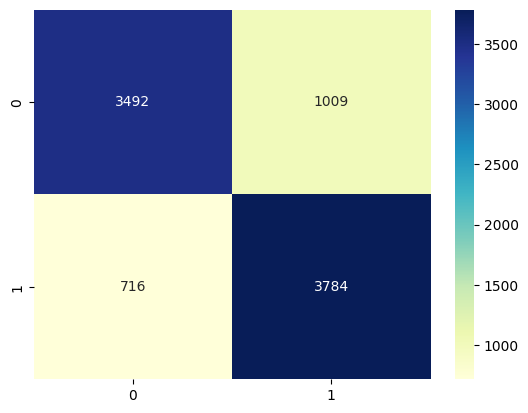

In [28]:
data1 = pd.read_csv('./Data/data+column_relation.csv')
# verified  location tweet_language url avg_tweets_by_hour_of_day following/years followers/lastpost 
data1=data1.loc[:,[ 'statuses', 'date_joined',
       'most_recent_post', 'following', 'followers',  'favourites', 'lists',
          'tweets_this_week','retweet', 'retweeted_count',
        'userNameScore', 
       'avg_tweets_by_day_of_week', 
       'engagment_rate', 'description', 'screen_name', 'account_type']]


#  for oversimpling
{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2}

from imblearn.over_sampling import SMOTE
df=data1
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('rf', DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=5,max_features='sqrt',
                                 min_samples_leaf=4,min_samples_split=2 )) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)
cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

#  cross validation

random undersimpling

In [31]:

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# import gender_guesser.detector as gender
# import matplotlib.pyplot as plt 
# from datetime import datetime
# from sklearn import metrics
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report

# data1 = pd.read_csv('./Data/data+column_relation.csv')
# data1=data1.loc[:,[ 'statuses', 'date_joined',
#        'most_recent_post', 'following', 'followers',  'favourites', 'lists',
#           'tweets_this_week','retweet', 'retweeted_count',
#         'userNameScore', 
#        'avg_tweets_by_day_of_week', 
#        'engagment_rate', 'description', 'screen_name', 'account_type']]
# from sklearn.model_selection import KFold, cross_val_score
# df1=data1[data1.account_type== 1].head(11000)
# df2=data1[data1.account_type== 0].head(11000)
# df = pd.concat([df1, df2], ignore_index=True)
# x=df.iloc[:, :-3]
# y = df.account_type.values.tolist()
# k_folds = KFold(n_splits = 10)
# clf=DecisionTreeClassifier()
# scores = cross_val_score(clf, x, y, cv = k_folds)

# print("Average CV Score: ", scores.mean())
# # Average CV Score:  0.6761818181818182

Average CV Score:  0.6761818181818182


oversimpling

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/data+column_relation.csv')
data1=data1.loc[:,[ 'statuses', 'date_joined',
       'most_recent_post', 'following', 'followers',  'favourites', 'lists',
          'tweets_this_week','retweet', 'retweeted_count',
        'userNameScore', 
       'avg_tweets_by_day_of_week', 
       'engagment_rate', 'description', 'screen_name', 'account_type']]
from sklearn.model_selection import KFold, cross_val_score
from imblearn.over_sampling import SMOTE

df=data1
x=df.iloc[:, :-3]
y = df.account_type.values.tolist()

smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
k_folds = KFold(n_splits = 5)
clf=DecisionTreeClassifier()
scores = cross_val_score(clf, x, y, cv = k_folds)

print("Average CV Score: ", scores.mean())
# Average CV Score:  0.653887284128924

Average CV Score:  0.653887284128924
